<a href="https://colab.research.google.com/github/Monikarangasamy/car_price_predict/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir car

In [4]:
#importing the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
#Data Collection and Processing
#1.Loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv("/content/car/car data.csv")

In [15]:
#inspecting the first 5 rows of the daatframe
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# checking the  number of rows and columns
car_dataset.shape

(301, 9)

In [17]:
#Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
#checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [19]:
#checking the distribution of the categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [49]:
#Encoding "fuel_type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding "seller_type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset = car_dataset.infer_objects(copy=False)

In [21]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [22]:
# Splitting the data and target value
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [23]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [24]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [27]:
#Model training
#1.linear regression --> load the linear regression model
lin_reg_model= LinearRegression()

In [28]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [29]:
#Model evaluation
#prediction on training data
training_data_prediction=lin_reg_model.predict(x_train)

In [30]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared Error :", error_score )

R squared Error : 0.8799451660493711


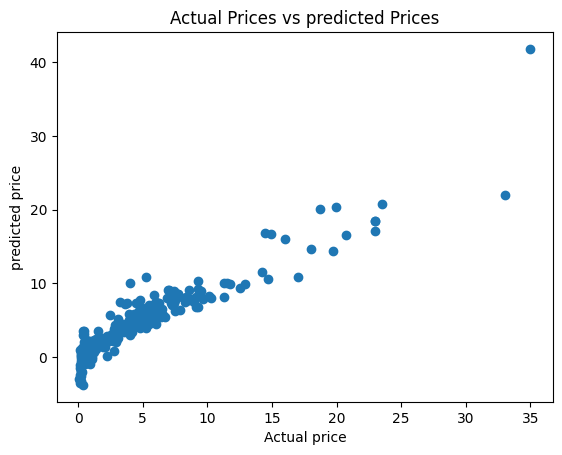

In [33]:
#visualize the actual price and predicted price
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual Prices vs predicted Prices")
plt.show()

In [36]:
print(x_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

In [37]:
print(x_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

In [38]:
# prediction on training data
test_data_prediction = lin_reg_model.predict(x_test)

In [39]:
#R square error
error_score= metrics.r2_score(y_test,test_data_prediction)
print("R squared error: " ,error_score)

R squared error:  0.8365766715027051


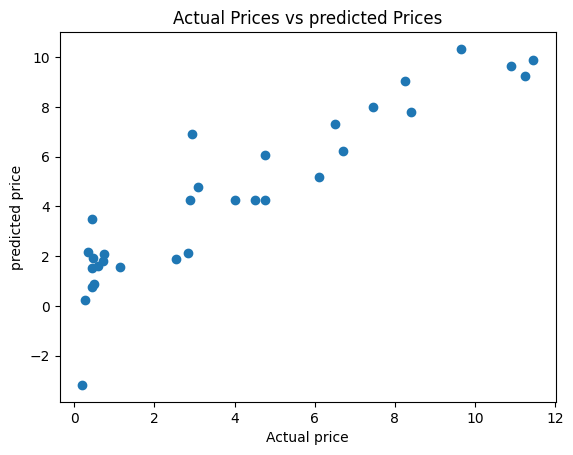

In [40]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual Prices vs predicted Prices")
plt.show()

In [41]:
#Model training using lasso regression
#1.lasso regression --> load the lasso regression model
lass_reg_model= Lasso()

In [42]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [43]:
#Model evaluation
#prediction on training data
training_data_prediction=lass_reg_model.predict(x_train)

In [44]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared Error :", error_score )

R squared Error : 0.8427856123435794


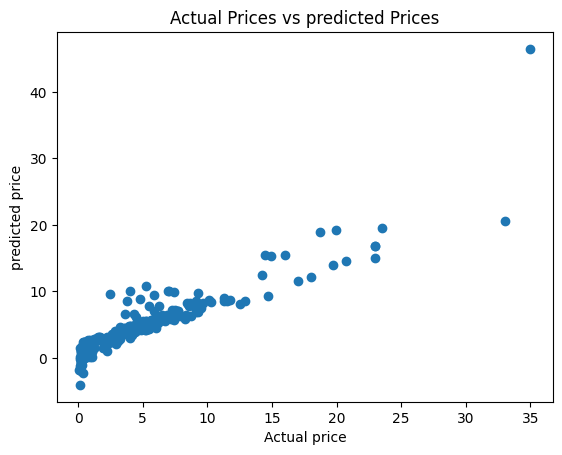

In [45]:
#visualize the actual price and predicted price
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual Prices vs predicted Prices")
plt.show()

In [ ]:
print(x_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

In [ ]:
print(x_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

In [46]:
# prediction on training data
test_data_prediction = lass_reg_model.predict(x_test)

In [47]:
#R square error
error_score= metrics.r2_score(y_test,test_data_prediction)
print("R squared error: " ,error_score)

R squared error:  0.8709167941173195


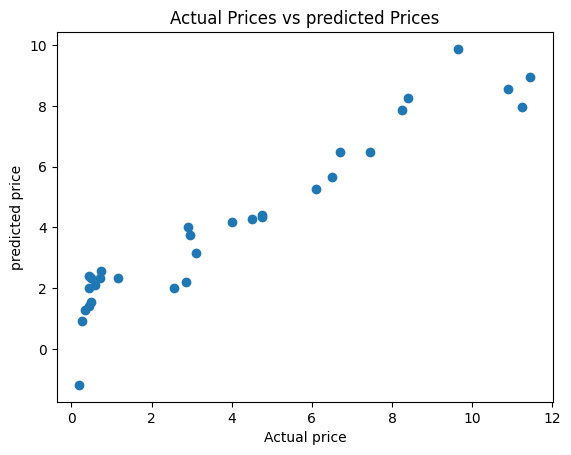

In [48]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual Prices vs predicted Prices")
plt.show()